# LOGISTIC REGRESSION

## 1. Data Exploration:

### a. Load the dataset and perform exploratory data analysis (EDA).

In [148]:
import warnings
warnings.filterwarnings('ignore')

In [149]:
import pandas as pd

In [150]:
# Importing Data
df = pd.read_csv('./Titanic_train.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### b. Examine the features, their types, and summary statistics.

In [151]:
# Checking for Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ignoring all the null values for the moment.

In [152]:
# Checking for Duplicated Values
df.duplicated().sum()

0

In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

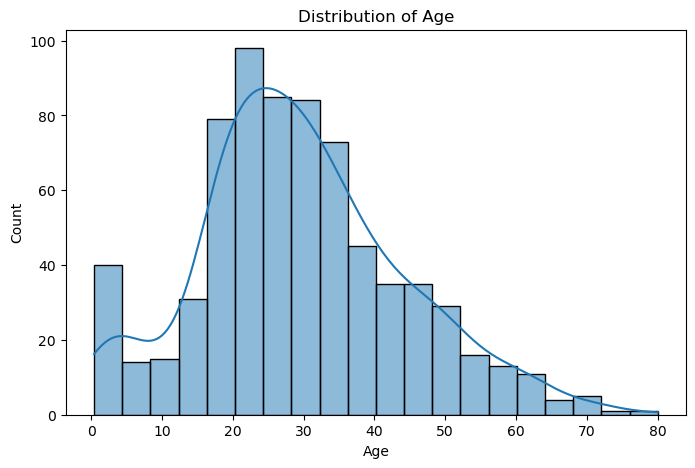

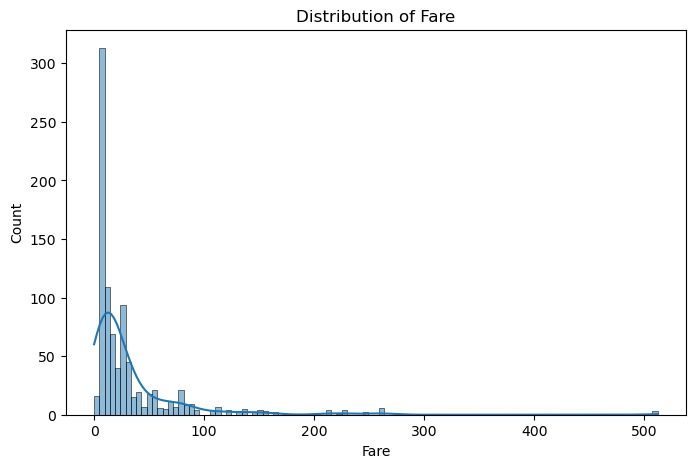

In [155]:
# Visualize the distribution of numerical features
num_features = ['Age', 'Fare']
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

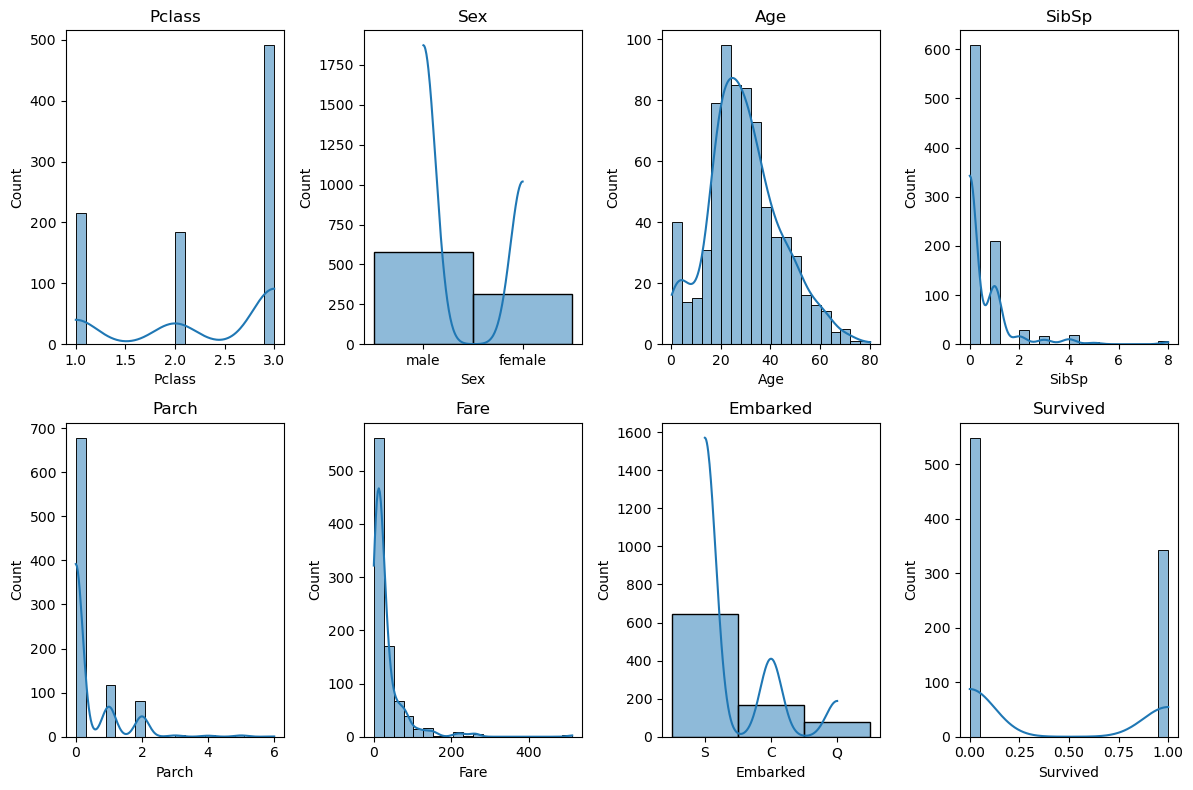

In [156]:
# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


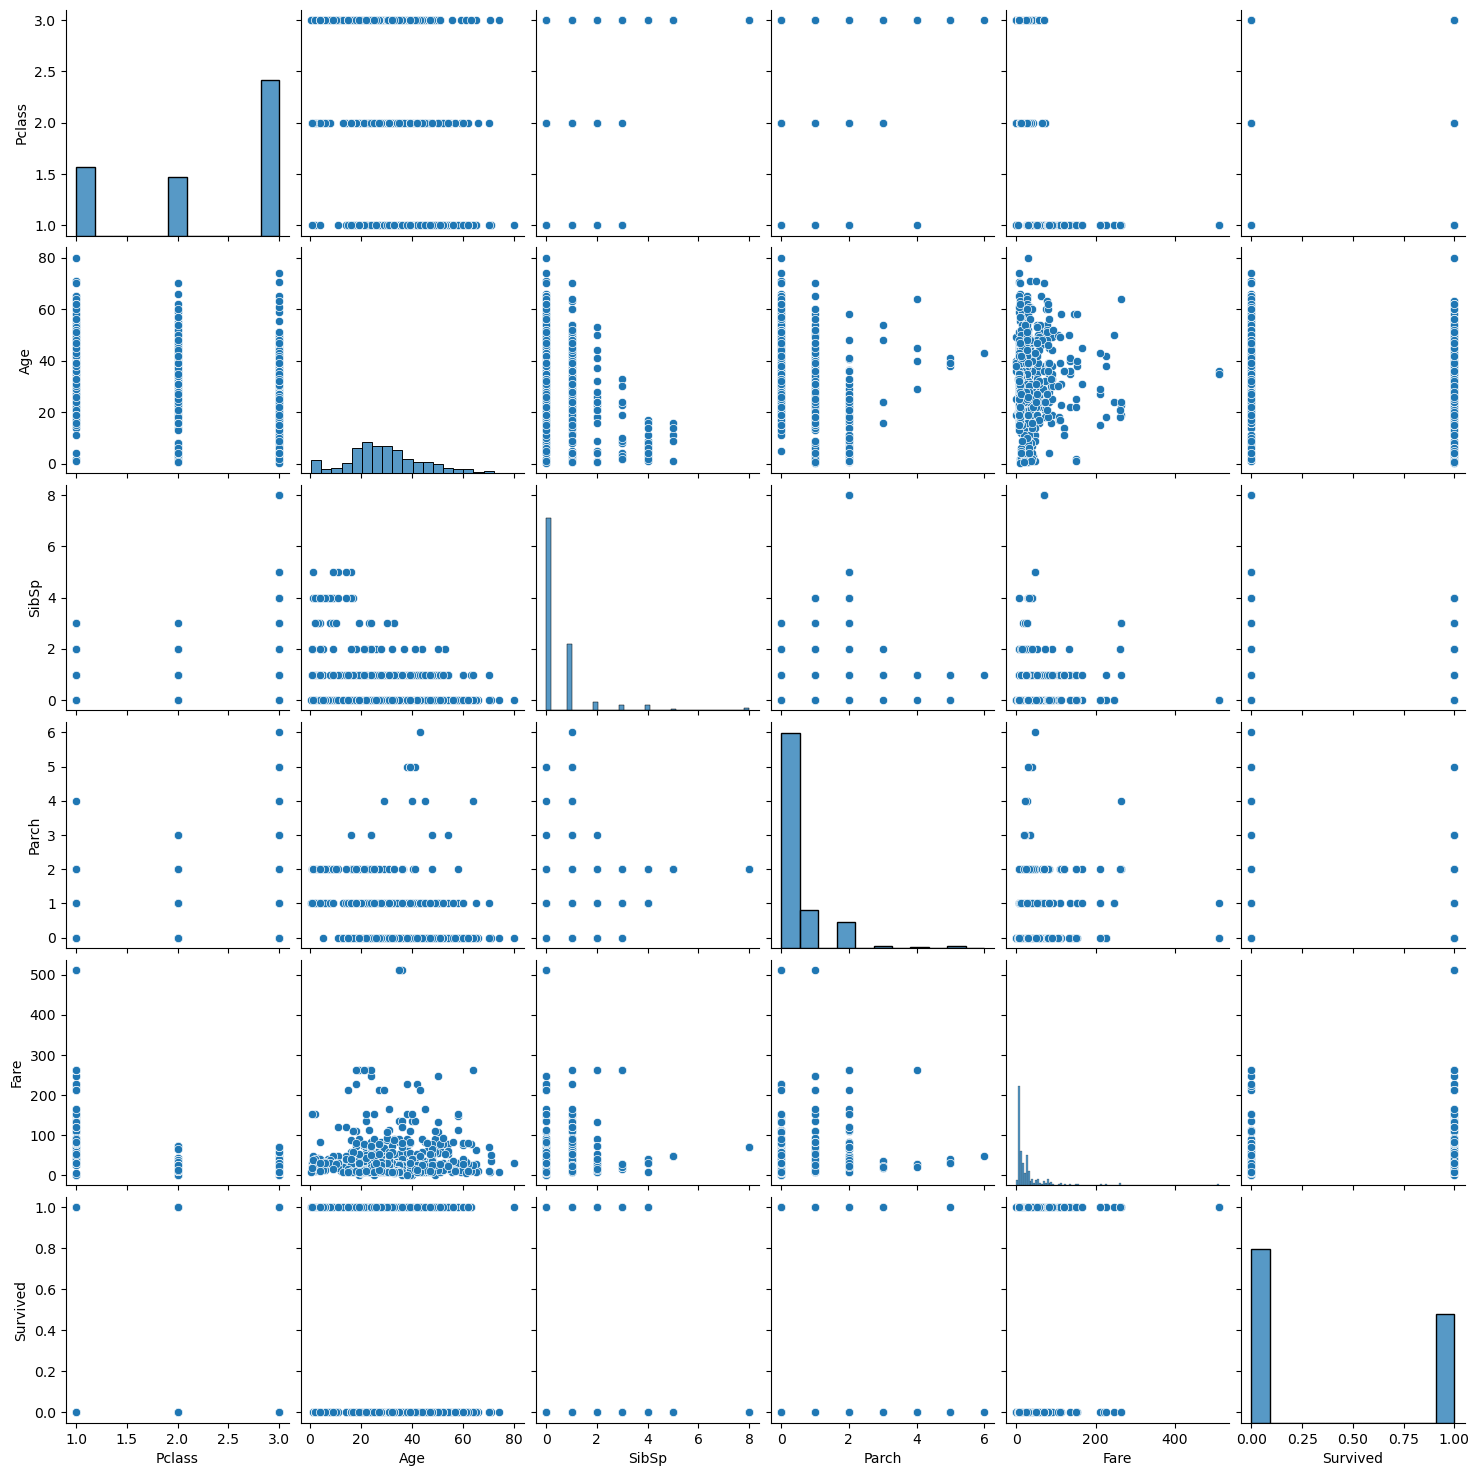

In [157]:
# Scatter plots for pairs of variables
sns.pairplot(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']])
plt.show()

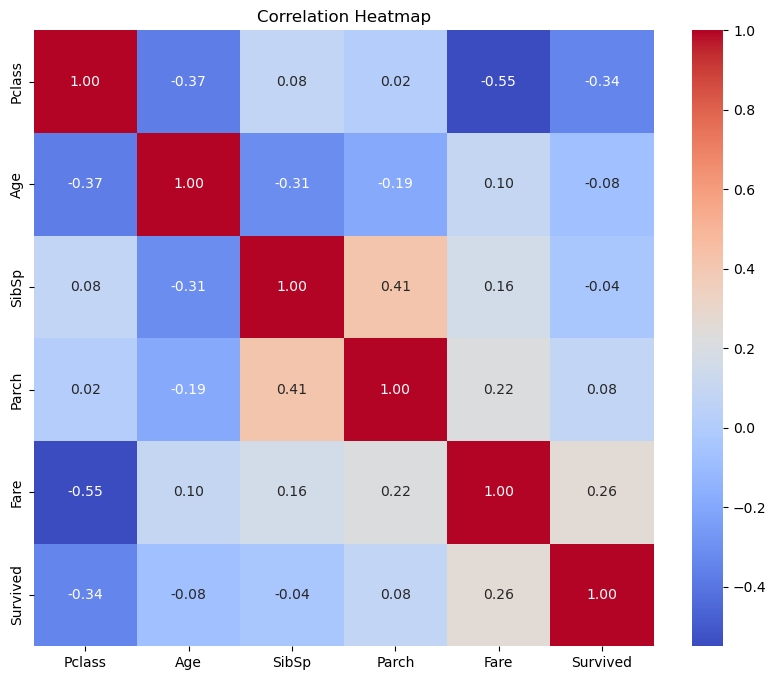

In [158]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

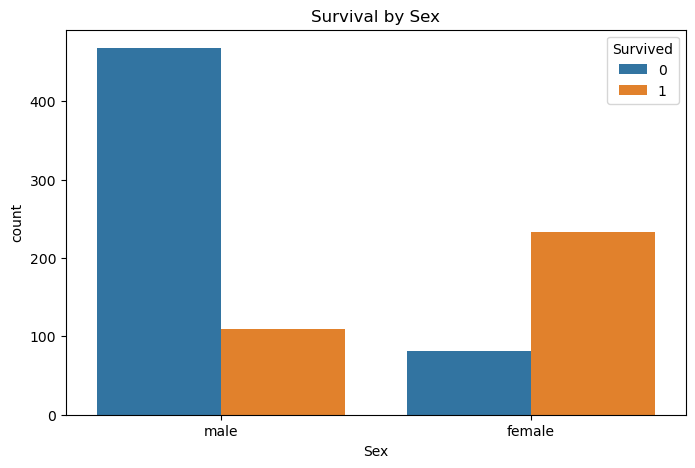

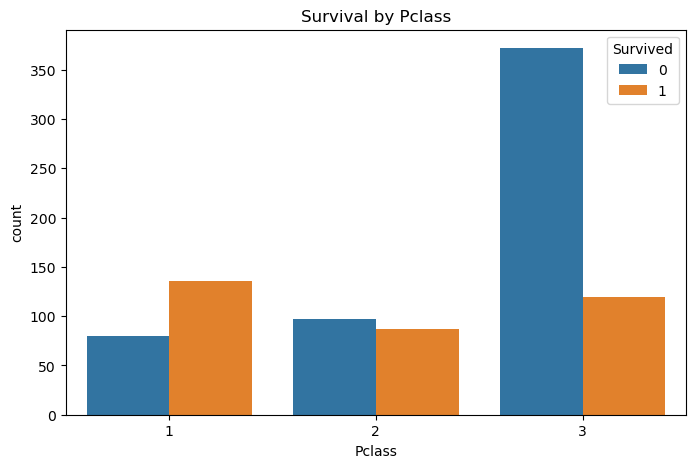

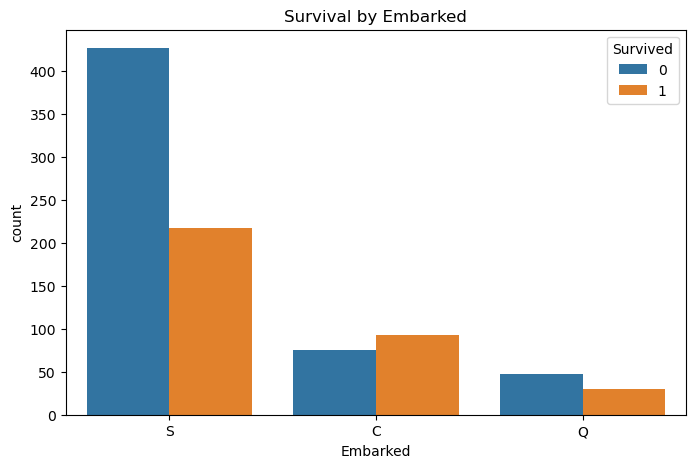

In [159]:
# Visualize the relationship between categorical features and the target variable
cat_features = ['Sex', 'Pclass', 'Embarked']
for feature in cat_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue=df['Survived'])
    plt.title(f'Survival by {feature}')
    plt.show()

### Analyze any patterns or correlations observed in the data.

### Observations:

1. The age distribution indicates that the majority of passengers were relatively young, with a significant proportion being below the age of 38. This suggests that the Titanic attracted a diverse range of age groups, including families with children and elderly passengers.

2. The variability in the number of siblings/spouses and parents/children aboard reflects the different family sizes and compositions among passengers. This information could be useful for analyzing the survival rates of passengers based on their family relationships.

3. The wide range of fares paid by passengers indicates disparities in socioeconomic status among the passengers. This could have implications for survival probabilities, as passengers who paid higher fares may have had access to better accommodations and facilites on the ship.

## 2. Data Preprocessing:

### a. Handle missing values (e.g., imputation).

In [160]:
# Imputing Missing Values in Numerical Columns:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1,1)).ravel()

imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df['Embarked'].values.reshape(-1, 1)).ravel()

print(f'Missing Values')
print(f'Age: {df.Age.isnull().sum()}')
print(f'Embarked: {df.Embarked.isnull().sum()}')

Missing Values
Age: 0
Embarked: 0


In [161]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### b. Encode categorical variables.

In [162]:
# Encoding Categorical Variables:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0


## 3. Model Building:

### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [163]:
# Defining Features and Target Variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### b. Train the model using the training data.

In [167]:
# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [170]:
# Making Predictions
y_pred = model.predict(X_test)

## 4. Model Evaluation:

### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [175]:
# Calculating Evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8001930501930502
Confusion Matrix:
 [[90 15]
 [19 55]]


### Visualize the ROC curve.

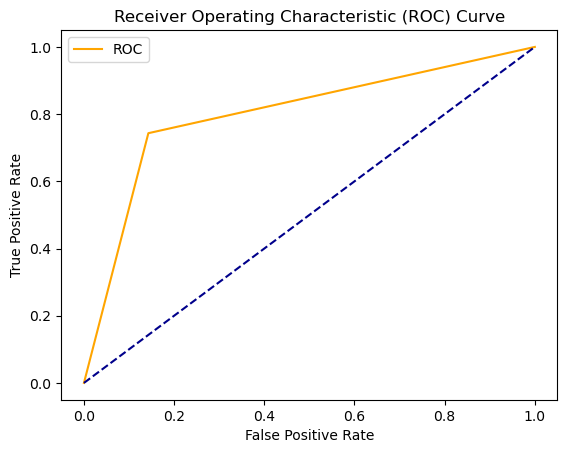

In [173]:
# Visualize the ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 5. Interpretation:

### a. Interpret the coefficients of the logistic regression model.

In [177]:
# Coefficients of the logistic regression model

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print(coefficients)

    Feature  Coefficient
0    Pclass    -0.932423
1       Sex    -2.597091
2       Age    -0.031173
3     SibSp    -0.295533
4     Parch    -0.116135
5      Fare     0.002499
6  Embarked    -0.222373


##### Interpretation: 

Positive coefficients indicate a positive correlation with survival, while negative coefficients indicate a negative correlation.

### b. Discuss the significance of features in predicting the target variable (survival probability in this case).

* From the coefficients, we can see that features like Sex, Age, Fare, and Pclass have significant impacts on predicting survival probability.
* For example, being female tends to increase the likelihood of survival, while higher passenger class (Pclass) and older age decrease it.
* Fare also shows a positive correlation, suggesting that passengers who paid higher fares were more likely to survive.

## Predicting on New Data:

In [186]:
# Testing Model on New Data:

data = pd.read_csv('./Titanic_test.csv')
new_data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Imputing Missing Values in Numerical Columns (for new_data):

imputer = SimpleImputer(strategy='mean')
new_data['Age'] = imputer.fit_transform(new_data['Age'].values.reshape(-1,1)).ravel()

imputer = SimpleImputer(strategy='most_frequent')
new_data['Embarked'] = imputer.fit_transform(new_data['Embarked'].values.reshape(-1, 1)).ravel()

imputer = SimpleImputer(strategy='mean')
new_data['Fare'] = imputer.fit_transform(new_data['Fare'].values.reshape(-1, 1)).ravel()

print(f'Missing Values')
print(f'Age: {new_data.Age.isnull().sum()}')
print(f'Embarked: {new_data.Embarked.isnull().sum()}')
print(f'Fare: {new_data.Fare.isnull().sum()}')

# Encoding Categorical Variables (for new_data):

label_encoder = LabelEncoder()
new_data['Sex'] = label_encoder.fit_transform(new_data['Sex'])
new_data['Embarked'] = label_encoder.fit_transform(new_data['Embarked'])

display(new_data)

Missing Values
Age: 0
Embarked: 0
Fare: 0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [196]:
new_pred = pd.Series(model.predict(new_data), name='Survived')
result = pd.concat([data, new_pred], axis=1)
display(result)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


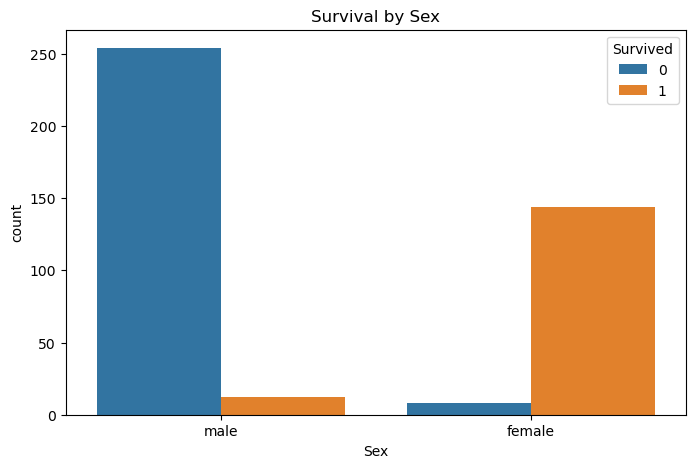

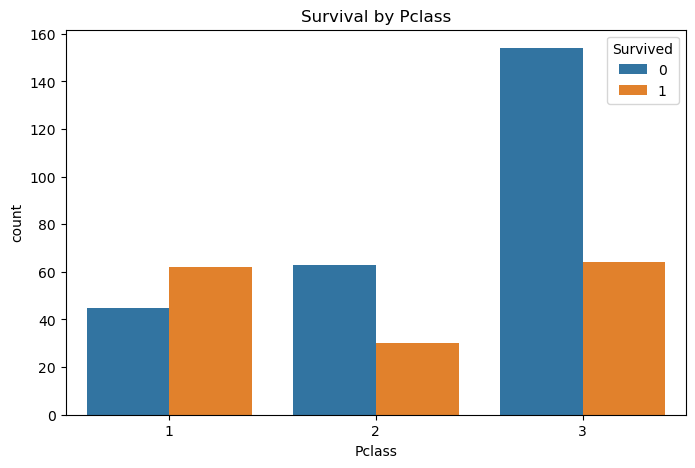

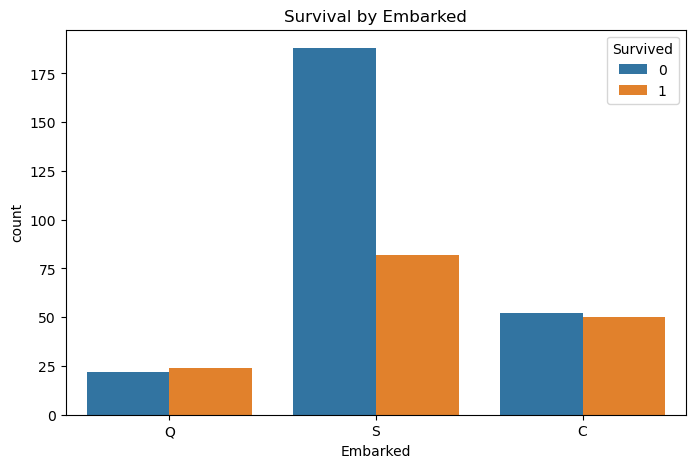

In [197]:
# Visualize the relationship between categorical features and the target variable
# using new data and model predicted values
cat_features = ['Sex', 'Pclass', 'Embarked']
for feature in cat_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=result, x=feature, hue=result['Survived'])
    plt.title(f'Survival by {feature}')
    plt.show()

## 6. Deployment with Streamlit:

### Exporting Model

In [198]:
from pickle import dump

dump(model, open('Logistic_Model.sav', 'wb'))

### Deployment Done! 
#### Run File 'deployment.py' using command 'streamlit run deployment.app'

## Interview Questions:

### 1. What is the difference between precision and recall? 

* Precision:

    Precision in the ratio of true positive predictions to the total number of positive predictions made by the classifier. It measures the accuracy of positive predictions, indicating the proportion of correctly predicted positive cases out of all cases predicted as positive. 
    
    Precision is calculated as TP / (TP + FP), where TP is the number of true positive and FP is the number of false positive.

* Recall:

    Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive cases in the dataset. It measures the ability of the classifier to correctly identify all positive instances, indicating the proportion of correctly predicted positive cases out of all actual positive cases. 
    
    Recall is calculated as TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.


### 2. What is cross-validation, and why is it important in binary classification?

* Cross-Validation:

    Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets, called folds. The model is trained on a subset of the data called training set and then validated on the remaining data (validation set). This process is repeated multiple times, with different subsets used for training and validation in each iteration. Common cross-validation techniques include k-fold cross-validation, stratified k-fold cross-validation, and leave-one-out cross-validation.

    Overall, cross-validation helps assess the generalization ability of the model and provides insights into its stability and reliability across different data samples.

* Importance in Binary Classification:

    In binary classification tasks, cross-validation is crucial for several reasons:

    * Performance Estimation:
    
        Cross-validation provides a more accurate estimate of the model's performance by reduction the variance in performance metrics compared to a single train-test split.

    * Avoiding Overfitting:

        Cross-validation helps identify whether the model is overfitting the training data by evaluating its performance on unseen data.

    * Hyperparameter Tuning:

        Cross-validation is used to tune the model's hyperparameters by selecting the combination that results in the best average performance across different validation folds.

    * Data Variability:

        It ensures that the model's performance is robust across different subsets of the data, capturing the variability present in real-world scenarios.